In [ ]:
# ! pip install nltk

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Analytics/Metrics
from sklearn.feature_extraction.text import CountVectorizer
from src.functions import write_target_descriptive_categories, create_word_frequency_table

# Data Cleaning
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hlmq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hlmq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Variables

In [2]:
# Variables

# Input data filepath
RAW_DIRNAME = "data/"
# Input data
filename = "downsampled_dataset.csv"

# Output filepath
OUTPUT_DIRNAME = "data/"
OUTPUT_FILENAME = "wordcloud_data.csv"

In [3]:
# Read in data
df = pd.read_csv(str(RAW_DIRNAME)+str(filename))

## String Cleaning

In [4]:
# List of stopwords.  Add any words you would like to clean from your dataset.
newStopWords = ['ourselves', 'here', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 
                'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 
                'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 
                'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 
                'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 
                'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 
                'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 
                'myself', 'which', 'those', 'i', 'I','after', 'few', 'whom', 'being', 'if', 'theirs', 'my', 'against','a', 'by', 'doing', 
                'it', 'how', 'further', 'was', 'here','than','can', 'let', 'll', 'that',
                # Chevron specific items added below:
                "chevron", "technology", "technologies", "team", "project", "technology", "’", ".", "use", ",", "identify", "case", "study"
                
               ]

In [5]:
ps=PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Lowercase words
df['clean_title'] = df['TITLE'].apply(lambda x: x.lower() if isinstance(x, str) else x)
# Remove stopwords
df['clean_title'] = df['clean_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (newStopWords)]))
# Tokenize
df['clean_title'] = df['clean_title'].apply(nltk.word_tokenize)
# Lemmatize
df['clean_title'] = df['clean_title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x]))
# Remove stopwords
df['clean_title'] = df['clean_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (newStopWords)]))

In [6]:
df['CATEGORY'].value_counts()
df['Descriptive Category'] = df['CATEGORY'].apply(lambda x: write_target_descriptive_categories(x))
df['Descriptive Category'].value_counts()

Descriptive Category
Science.Technology    30224
Business              22666
Health                16117
Entertainment         15477
Name: count, dtype: int64

In [8]:
# Output filepath

toggle = list(df['Descriptive Category'].unique())[3]                  # ['Entertainment', 'Business', 'Health', 'Science/Technology']

WordFreq = create_word_frequency_table(df, category=toggle)

# Save to csv
OUTPUT_DIRNAME = "data/"
OUTPUT_FILENAME = f"{toggle}_wordcloud_data.csv"
WordFreq.to_csv(str(OUTPUT_DIRNAME)+str(OUTPUT_FILENAME),index=False)

## Check Word Counts

Text(0.5, 1.0, 'Most Common Words')

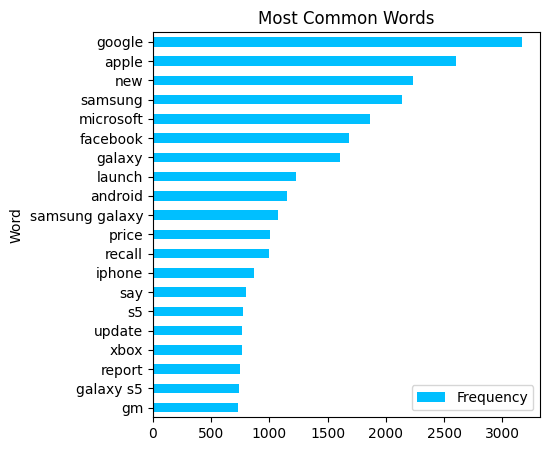

In [9]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(5, 5))
WordFreq.sort_values(by='Frequency').plot.barh(
                  x='Word',
                  y='Frequency',
                  ax=ax,
                  color="deepskyblue")

# COLORS: darkred, goldenrod, forestgreen, deepskyblue, rebeccapurple

plt.title("Most Common Words")

## Write out files

In [ ]:
WordFreq.to_csv(str(OUTPUT_DIRNAME)+str(OUTPUT_FILENAME),index=False)